<a href="https://colab.research.google.com/github/satani99/practical_deep_learning_for_coders/blob/main/fast_ai_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 74 kB 3.1 MB/s 
     |████████████████████████████████| 4.2 MB 50.4 MB/s 
     |████████████████████████████████| 49 kB 3.3 MB/s 
     |████████████████████████████████| 112 kB 73.4 MB/s 
     |████████████████████████████████| 146 kB 69.9 MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-3oc9qa57/lxml_50e0b944751c4debba5ec4479160603a/setup.py'"'"'; __file__='"'"'/tmp/pip-install-3oc9qa57/lxml_50e0b944751c4debba5ec4479160603a/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-5swilkim/install-record.txt --s

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'nikhilsatani'
os.environ['KAGGLE_KEY'] = 'ec88f260eb867087af019a6f279845ff'

In [3]:
%%bash
mkdir /content/data
cd /content/data
kaggle datasets download -d hoturam/bear-dataset --unzip

100%|██████████| 7.68M/7.68M [00:01<00:00, 7.44MB/s]


In [4]:
from fastai.vision.all import *

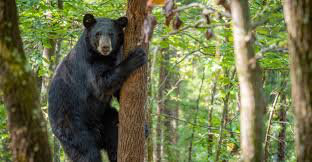

In [5]:
im = Image.open('/content/data/data/black/black1.jpg')
im

In [6]:
bear_types = 'grizzly', 'black', 'teddy', 'panda', 'polar'

In [7]:
path = Path('/content/data/data')
fns = get_image_files(path)
fns

(#309) [Path('/content/data/data/teddy/teddy_bear23.jpg'),Path('/content/data/data/teddy/teddy_bear19.jpg'),Path('/content/data/data/teddy/teddy_bear5.jpg'),Path('/content/data/data/teddy/teddy_bear13.jpg'),Path('/content/data/data/teddy/teddy_bear17.jpg'),Path('/content/data/data/teddy/teddy_bear38.jpg'),Path('/content/data/data/teddy/teddy_bear36.jpg'),Path('/content/data/data/teddy/teddy_bear20.jpg'),Path('/content/data/data/teddy/teddy_bear43.jpg'),Path('/content/data/data/teddy/teddy_bear7.jpg')...]

In [8]:
failed = verify_images(fns)
failed

(#0) []

In [9]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [11]:
dls = bears.dataloaders(path)

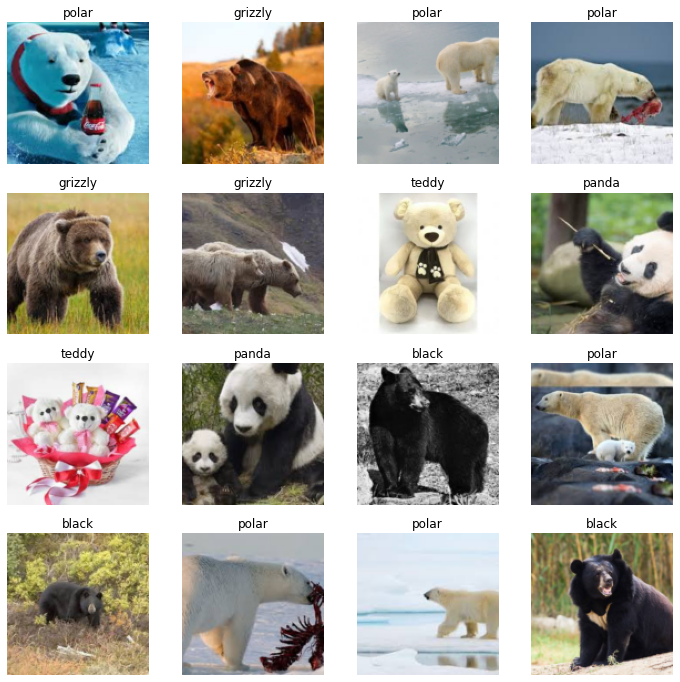

In [15]:
dls.valid.show_batch(max_n=16, nrows=4)

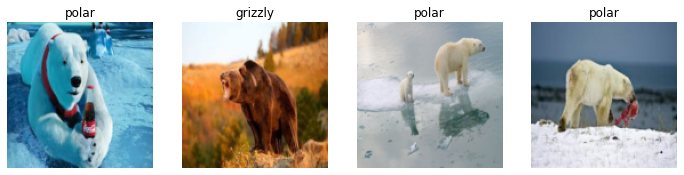

In [16]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)
                      

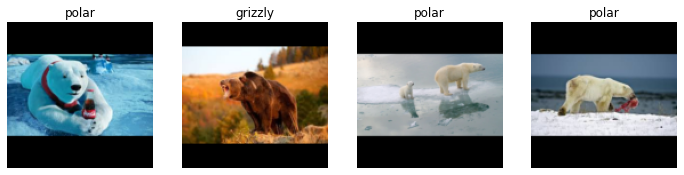

In [18]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path) 
dls.valid.show_batch(max_n=4, nrows=1)

In [21]:
doc(Resize)

Resize(self, size, method='crop', pad_mode='reflection', resamples=(2, 0), **kwargs)
A transform that before_call its state at each `__call__`

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


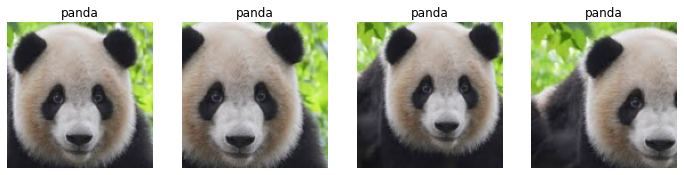

In [25]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)